In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
df = pd.DataFrame({"Salario":[1500,600,1800,700,1400,3100,2900,4200,5100,4500],
                  "Ahorro": [11000,5700,1500,7100,4900,11000,13000,14000,18000,16000],
                  "Credito Aprobado":[0,0,0,0,0,1,1,1,1,1]})

In [3]:
df.head(10)

,Salario,Ahorro,Credito Aprobado
0,1500,11000,0
1,600,5700,0
2,1800,1500,0
3,700,7100,0
4,1400,4900,0
5,3100,11000,1
6,2900,13000,1
7,4200,14000,1
8,5100,18000,1
9,4500,16000,1


In [4]:
X = df.loc[:,["Salario","Ahorro"]].to_numpy()
y = df["Credito Aprobado"].to_numpy()

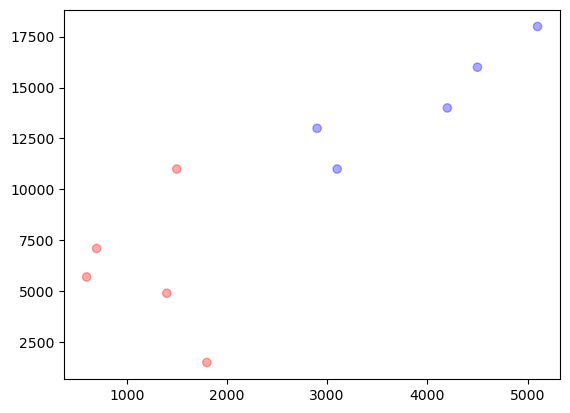

In [5]:
fig, ax = plt.subplots()
colors = list(map(lambda i: ["#FF000055","#0000FF55"][i],y))
ax.scatter(X[:,0], X[:,1], c=colors);

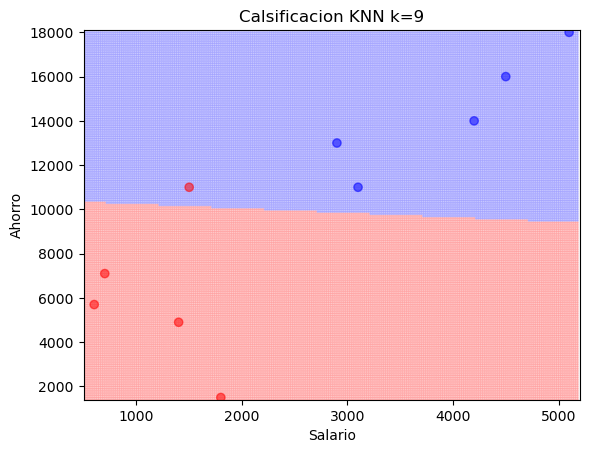

In [12]:
n_neighbors = 9
h = 100  # tamano de la grilla

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# crear grilla de puntos y hacer prediccion sobre ellos
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h/5), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# graficar la grilla
plt.figure()
colors = list(map(lambda i: ["#FF000033","#0000FF33"][i],Z))
plt.scatter(xx, yy, c=colors, s=1)

# graficar los puntos de entrenamiento
colors = list(map(lambda i: ["#FF000088","#0000FF88"][i],y))
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Salario")
plt.ylabel("Ahorro")
plt.title(f"Calsificacion KNN k={n_neighbors}")
plt.show()